In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
import seaborn as sns
%matplotlib inline
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import matplotlib.pyplot as plt

In [2]:
# For a single neuron the value would be inputs*weights + bias
inputs = np.array([1,2,3,2.5])
weights = np.array([0.2,0.8,-0.5,1.0])
bias = 2

output = np.dot(inputs, weights) + bias
print(output)

4.8


In [3]:
# for multiple neurons

inputs = np.array([1,2,3,2.5])
weights = np.array([[0.2,0.8,-0.5,1.0],
                   [0.5,-0.91,0.26,-0.5],
                   [-0.26,-0.27,0.17,0.87]])

biases = np.array([2,3,0.5])
layer_outputs = np.dot(inputs, weights.T)+biases
print(layer_outputs)

[4.8   1.21  2.385]


In [4]:
# for multiple neurons

inputs = np.array([1,2,3,2.5])
weights = np.array([[0.2,0.8,-0.5,1.0],
                   [0.5,-0.91,0.26,-0.5],
                   [-0.26,-0.27,0.17,0.87]])

biases = np.array([2,3,0.5])
layer_outputs = np.dot(inputs, weights.T)+biases
print(layer_outputs)

[4.8   1.21  2.385]


In [5]:
# for multiple inputs

inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5,2.7,3.3, -0.8]]

weights = np.array([[0.2,0.8,-0.5,1.0],  # this weight index is for next neurons input weights, it is then transposed
                   [0.5,-0.91,0.26,-0.5],
                   [-0.26,-0.27,0.17,0.87]])

biases = np.array([2,3,0.5])
layer_outputs = np.dot(inputs, weights.T)+biases
print(layer_outputs)
# Number of columns indicate the number of neurons/outputs present in the next layer

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [6]:
# for multiple inputs

inputs = [[1.0, 2.0, 3.0, 2.5],
          [2.0, 5.0, -1.0, 2.0],
          [-1.5,2.7,3.3, -0.8]]

weights1 = np.array([[0.2,0.8,-0.5,1.0], 
                   [0.5,-0.91,0.26,-0.5],
                   [-0.26,-0.27,0.17,0.87]])

biases1 = np.array([2,3,0.5])

# Supposing the next layer has 3 neurons
# the weights2 shape should be rows = number of neurons, columns = number of columns in the previous layers output

weights2 = np.array([[0.1,-0.14,0.5],
                    [-0.5, 0.12, -0.33],
                    [-0.44,0.73,-0.13]])

biases2 = np.array([-1,2,-0.5])

layer1_outputs = np.dot(inputs, weights.T)+biases
print(layer1_outputs)
print(layer1_outputs.shape)
print()
layer2_outputs = np.dot(layer1_outputs, weights2.T)+biases2
print(layer2_outputs)
print(layer2_outputs.shape)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]
(3, 3)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]
(3, 3)


In [7]:
from nnfs.datasets import spiral_data

In [8]:
import nnfs
import numpy as np

nnfs.init()

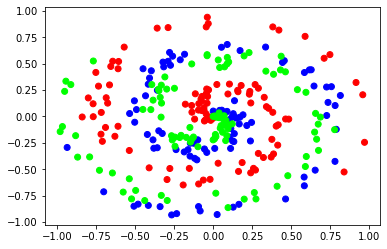

In [9]:
X,y = spiral_data(samples=100, classes = 3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='brg')
plt.show()

In [10]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.randn(n_neurons, n_inputs)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights.T) + self.biases
        
class Activation_ReLU:
    
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)

In [11]:
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense1.forward(X)
activation1.forward(dense1.output)

In [12]:
dense1.weights.T

array([[-0.01306527, -0.00118164,  0.00666383],
       [ 0.01658131, -0.00680178, -0.0046072 ]], dtype=float32)

In [13]:
# for multiple neurons

inputs = np.array([1,2,3,2.5])
weights = np.array([[0.2,0.8,-0.5,1.0],
                   [0.5,-0.91,0.26,-0.5],
                   [-0.26,-0.27,0.17,0.87]])

biases = np.array([2,3,0.5])
layer_outputs = np.dot(inputs, weights.T)+biases
print(layer_outputs)

[4.79999995 1.21000004 2.38499999]


In [14]:
# Softmax takes the exponential of the inputs
# But because it can go upto infinity we clip it by subtracting the maximum value of the input row from each row
print(layer_outputs)

softmax = np.exp(layer_outputs)
print(softmax)

# To convert the values into probablity we divide it by the sum of the exponent values
softmax /= sum(softmax)
softmax

[4.79999995 1.21000004 2.38499999]
[121.51041172   3.35348478  10.85906256]


array([0.89528266, 0.02470831, 0.08000903])

In [15]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.randn(n_neurons, n_inputs)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights.T) + self.biases
        
class Activation_ReLU:
    
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)
        
class Activation_Softmax:
    
    def forward(self,inputs):
        exponent = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        self.output = exponent/np.sum(exponent, axis = 1, keepdims = True)

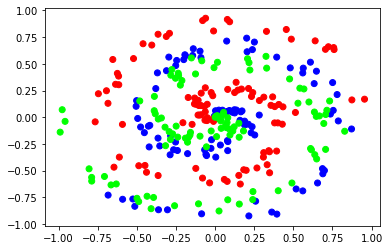

In [16]:
X,y = spiral_data(samples=100, classes = 3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='brg')
plt.show()

In [17]:
X.shape[1]

2

In [30]:
dense1_num_neruons = 3
dense1 = Layer_Dense(X.shape[1], dense1_num_neruons)
relu_activation1 = Activation_ReLU()

dense2_num_nerurons = 3
dense2 = Layer_Dense(dense1_num_neruons, dense2_num_nerurons)
softmax_activation1 = Activation_Softmax()

In [31]:
dense1.forward(X)
relu_activation1.forward(dense1.output)

dense2.forward(relu_activation1.output)
softmax_activation1.forward(dense2.output)

In [32]:
softmax_activation1.output[:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.33333302, 0.33333322, 0.33333376],
       [0.33333337, 0.33333325, 0.33333337],
       [0.3333334 , 0.33333316, 0.3333334 ],
       [0.33333343, 0.33333313, 0.33333343]], dtype=float32)

In [33]:
np.argmax(softmax_activation1.output, axis = 1)

array([0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
class Layer_Dense:
    
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.randn(n_neurons, n_inputs)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights.T) + self.biases
        
class Activation_ReLU:
    
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)
        
class Activation_Softmax:
    # Softmax is used to convert the output range of -inf to +inf into probabilities
    def forward(self,inputs):
        # subtracting the maximum value to prevent the overflow
        exponent = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        self.output = exponent/np.sum(exponent, axis = 1, keepdims = True)

class Loss:
    def calculate(self, output, y):
        sample_losses = self.forward(output, y)
        
        # mean value of all entire batch is considered
        data_loss = np.mean(sample_losses)
        
        return data_loss

    
class Loss_CategoricalCrossEntropy(Loss):
    
    def forward(self, y_pred, y_true):
        
        samples = y_pred.shape[0]
        
        # Clipping the values so that the log values does not become -inf
        y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        if len(y_true.shape) == 1:
            confidences = y_pred[range(samples), y_true]
            
        elif len(y_true.shape) == 2:
            confidences = np.sum(y_pred * y_true, axis = 1)
            
        # Values have been clipped so that log does not become -inf
        negative_log_likelihoods = -np.log(confidences)
        return negative_log_likelihoods

In [39]:
len(temp[0].shape)

1

In [46]:
softmax_outputs = np.array([[0.7, 0.1, 0.2], [0.1, 0.5, 0.4],
[0.02, 0.9, 0.08]]) 

class_targets = np.array([[1, 0, 0],
[0, 1, 0], [0, 1, 0]])


In [41]:
np.sum(softmax_outputs*class_targets, axis = 1)

array([0.7, 0.5, 0.9])

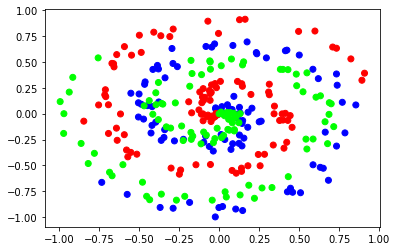

In [42]:
X,y = spiral_data(samples=100, classes = 3)
plt.scatter(X[:,0],X[:,1],c=y, cmap='brg')
plt.show()

In [43]:
dense1_num_neruons = 3
dense1 = Layer_Dense(X.shape[1], dense1_num_neruons)
relu_activation1 = Activation_ReLU()

dense2_num_nerurons = 3
dense2 = Layer_Dense(dense1_num_neruons, dense2_num_nerurons)
softmax_activation1 = Activation_Softmax()

loss_function = Loss_CategoricalCrossEntropy()

In [44]:
dense1.forward(X)
relu_activation1.forward(dense1.output)

dense2.forward(relu_activation1.output)
softmax_activation1.forward(dense2.output)

In [45]:
loss_function.calculate(softmax_activation1.output, y)

1.0986178

In [52]:
softmax_outputs = np.array([[0.7, 0.1, 0.2], [0.5, 0.1, 0.4], [0.02, 0.9, 0.08]]) 

class_targets = np.array([0,1,1])


In [53]:
def Accuracy(y_pred, y_true):
    
    if len(y_pred.shape) == 2:
        y_pred = np.argmax(y_pred, axis = 1)
    
    if len(y_true.shape) == 2:
        y_true = np.argmax(y_true, axis = 1)
        
    accuracy = np.mean(y_pred == y_true)
    print("Accuracy: ", accuracy)
    
    return accuracy

In [54]:
Accuracy(softmax_outputs, class_targets)

Accuracy:  0.6666666666666666


0.6666666666666666